In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("./data.csv")
df.head(2)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,842517,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant


In [ ]:
df.shape

(569, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.isna().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(569, 32)

In [ ]:
num_cols = df.iloc[:,1:-1].select_dtypes(exclude='object').columns.values
num_cols


array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

In [ ]:
le = LabelEncoder()

In [ ]:
for i in df.iloc[:,1:-1].columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

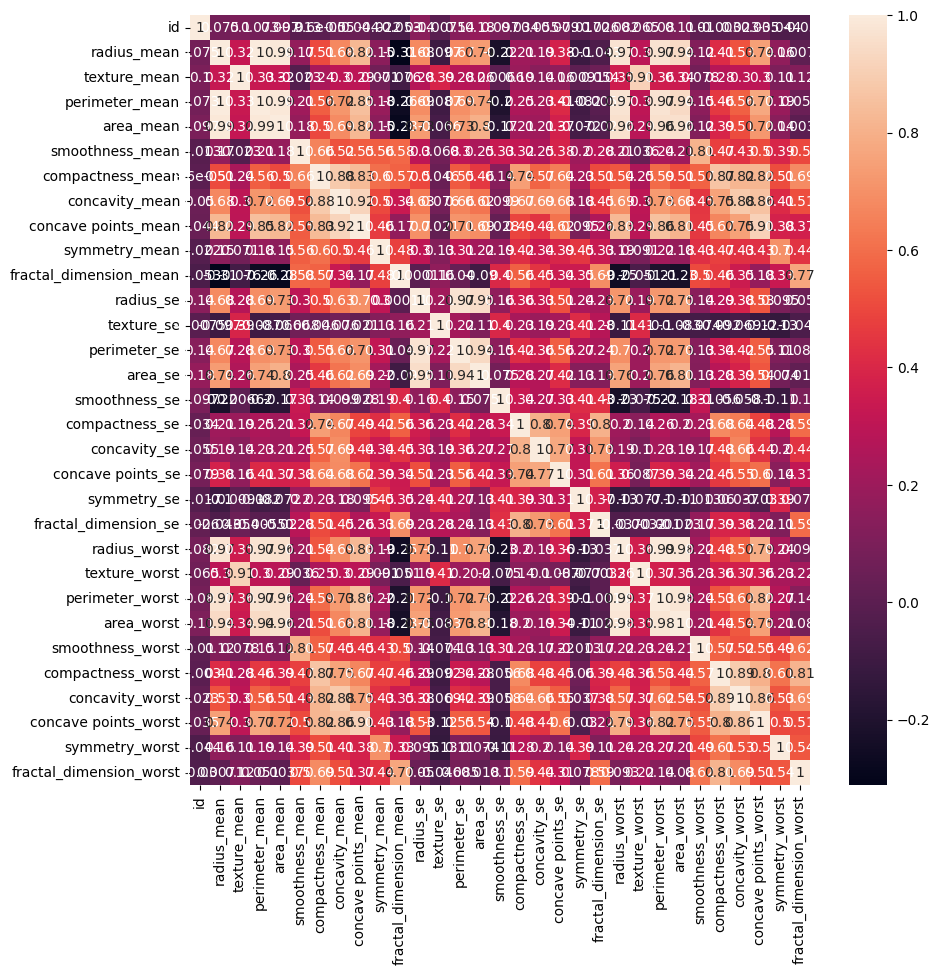

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
# Divide the data into “Attributes” and “labels”
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [ ]:
y.value_counts()

Benign       357
Malignant    212
Name: diagnosis, dtype: int64

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Split 80% of the data to the training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
sc = StandardScaler()
X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.fit_transform(X_test[num_cols])

In [ ]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
512,-0.226091,0.142994,-0.162200,-0.314494,0.958919,0.630548,0.581645,0.805273,1.076023,1.253061,...,0.019261,0.544941,0.157574,-0.068106,1.074429,0.704462,0.914505,1.334386,1.221015,1.329776
457,-0.280721,1.131139,-0.349542,-0.372199,-0.546661,-0.923753,-0.764644,-0.736258,-0.733788,-0.942753,...,-0.428804,1.270980,-0.519599,-0.494761,-0.131456,-0.911695,-0.632539,-0.819527,-0.775419,-0.945704
439,-0.047825,-0.872310,-0.122998,-0.161636,-1.094084,-0.862138,-0.843614,-0.588772,-0.843032,-0.940230,...,-0.307000,-1.099371,-0.358382,-0.381793,-1.210406,-0.938312,-0.950607,-0.491205,-1.314333,-0.986961
298,0.021181,-0.347946,-0.055737,-0.079988,-2.016410,-0.921295,-0.798884,-0.911524,-0.675525,-0.940230,...,-0.022066,-0.154091,-0.073176,-0.117933,-1.589096,-0.272870,-0.559683,-0.593073,-0.439472,-0.476009
37,-0.332475,-0.295718,-0.411027,-0.415478,-0.419261,-1.159561,-0.788854,-0.520333,-1.287292,-0.590867,...,-0.657187,-0.543324,-0.729735,-0.670264,-1.480778,-1.259518,-1.010016,-0.966833,-1.575042,-1.273115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.929762,1.195901,0.904910,0.886577,0.295376,0.101250,0.854868,0.407516,-1.866286,-0.587084,...,0.380323,0.292336,0.376016,0.288145,-0.326090,-0.489284,-0.044279,-0.079282,-2.246935,-0.929836
519,-0.412983,-0.655044,-0.415154,-0.507561,1.084993,0.053728,-0.636910,-0.502150,1.090589,0.367673,...,-0.407054,-0.713316,-0.447605,-0.512513,0.655543,-0.381656,-0.618801,-0.516598,0.321657,-0.010017
432,1.723332,-0.061738,1.701322,1.813548,1.138076,0.663321,1.374800,1.921015,-0.351434,-0.351232,...,1.241652,-0.184276,1.163641,1.212059,1.459466,0.175580,0.998602,1.515549,0.253418,-0.264964
516,1.185659,0.155528,1.164878,1.205799,0.706773,0.268396,0.724597,1.128277,0.143806,-0.492491,...,1.204676,-0.004752,1.046728,1.240301,0.727473,-0.059350,0.353722,0.531031,0.326906,-0.377098


In [ ]:
# Create a Linear Regression model and fit it
lr =LogisticRegression()
model = lr.fit(X_train,y_train)


In [ ]:
# Predicting the data
y_predict=model.predict(X_test)
y_predict

array(['Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign', 'Malignant', 'Benign', 'Malignant', 'Benign',
       'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Malignant',
       'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Malignant',
       'Benign', 'Malignant', 'Benign', 'Malignant', 'Benign',
       'Malignant', 'Benign', 'Malignant', 'Benign', 'Malignant',
       'Benign', 'Malignant', 'Malignant', 'Benign', 'Malignant',
       'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign',
       'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Benign',
       'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant',
       'Malignant', 'Malignant', 'Benign', 'Benign', 'Malignant',
       'Benign', 'Malignant', 'Malignant', 'Malignant', 'Benign',
       'Benign', 'Malignant', 'Benign', 'Malignant', 'Malignant',
       'Benign', 'Benign', 'Benign', 'Benign', 'Benig

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

0.956140350877193

In [ ]:
DT=DecisionTreeClassifier()
dt=DT.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
dt_acc_score=accuracy_score(y_test,dt_pred)*100
(dt_acc_score)

93.85964912280701

In [ ]:
RF=RandomForestClassifier()
rf=RF.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
rf_acc_score=accuracy_score(y_test,rf_pred)*100
(rf_acc_score)

97.36842105263158